In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [7]:
# Read the X from the csv file
dataFrame = pd.read_csv('./dataGenerator/nonLinearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
Y = np.array(dataFrame['y'])

print(X)

          x1         x2  y
0  63.172548  21.637501  1
1 -86.031959  63.867917  0
2 -60.634573  41.238189  0
3 -33.591675  60.607830  0
4 -27.424169  32.108817  0
[[ 63.17254778  21.63750065]
 [-86.03195934  63.86791653]
 [-60.63457332  41.2381889 ]
 ...
 [-57.40918117 -65.30837946]
 [ 48.24212233  72.95749637]
 [ 73.51284511  89.59888246]]


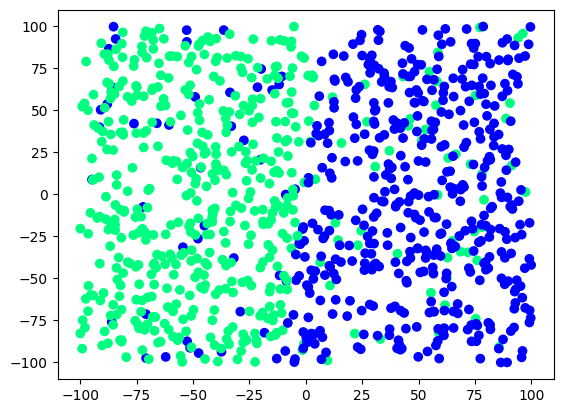

In [8]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [9]:
# Pocket Algorithm

numFeatures = 2
weights = np.zeros(numFeatures)
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
maxIterations = 10000

while not done:
    misclassified = 0
    for i in range(len(X)):
        if np.dot(X[i], weights) > 0:
            predicted = 1
        else:
            predicted = 0
        
        if predicted != Y[i]:
            misclassified += 1
            weights += learningRate * (Y[i] - predicted) * X[i]

    if misclassified == 0 or maxIterations == 0:
        done = True
    maxIterations -= 1

print("Number of iterations: ", maxIterations)
print("Weights: ", weights)

Dimension of weights:  (2,)
Dimension of X[0]:  (1000, 2)
Dimension of Y[0]:  (1000,)
Number of iterations:  -1
Weights:  [-46.3691117    6.17785374]


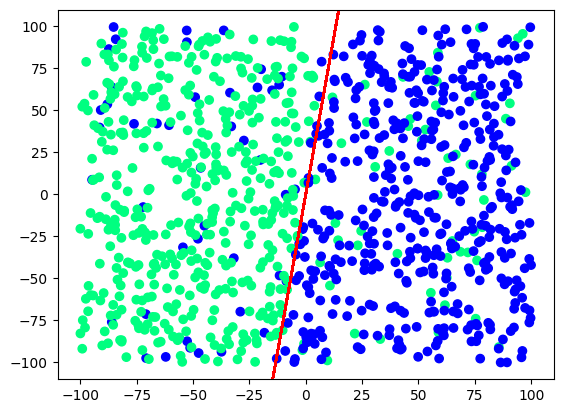

In [10]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.show()